In [14]:
import nsfg
import brfss
import numpy as np
import pandas
import thinkstats2
import thinkplot

In [8]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

In [9]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace = replace)
    sample = df.loc[indices]
    return sample

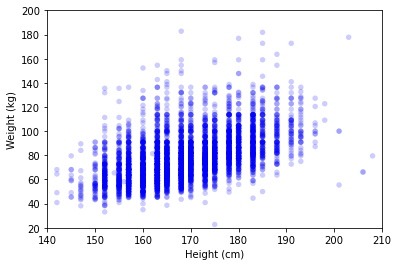

<Figure size 576x432 with 0 Axes>

In [10]:
thinkplot.Scatter(heights, weights)
thinkplot.Show(xlabel = "Height (cm)", ylabel = "Weight (kg)",
              axis = [140, 210, 20, 200])

In [11]:
heights = thinkstats2.Jitter(heights, 1.3)
weights = thinkstats2.Jitter(weights, 0.5)

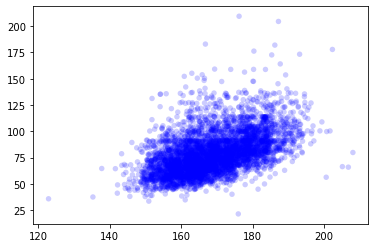

In [12]:
thinkplot.Scatter(heights, weights, alpha = 0.2)

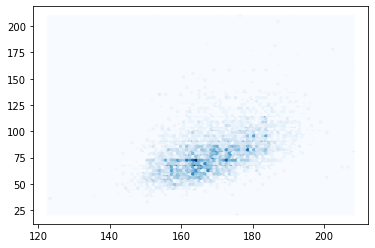

In [13]:
thinkplot.HexBin(heights, weights)

In [19]:
df = df.dropna(subset = ["htm3", "wtkg2"])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

In [20]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [21]:
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

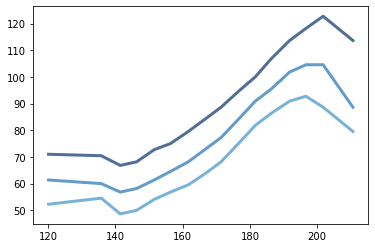

In [28]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label = label)